<a href="https://colab.research.google.com/github/debplana/bmi707/blob/master/Assignment2Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 Primer

Modified from BMI707 2017-2018 Assignment 2 Primer


**Before running anything go to Edit -> Notebook Settings and select GPU under accelerator**


First, we will download the training and validation datasets.

In [0]:
# use wget to download the datasets
!wget https://www.dropbox.com/sh/ojiw79q8786ua4x/AAClFIGmvlcD3yfvpBt4PCFpa/converted_to_RGB/train.tar
!wget https://www.dropbox.com/sh/ojiw79q8786ua4x/AACRvZFmEalGP26MHlH34dY8a/converted_to_RGB/val.tar
!wget https://www.dropbox.com/s/0kxwsuqt6srghe0/train.csv
!wget https://www.dropbox.com/s/ro24kdycm4cmmmh/val.csv

--2020-04-07 20:14:31--  https://www.dropbox.com/sh/ojiw79q8786ua4x/AAClFIGmvlcD3yfvpBt4PCFpa/converted_to_RGB/train.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ojiw79q8786ua4x/AAClFIGmvlcD3yfvpBt4PCFpa/converted_to_RGB/train.tar [following]
--2020-04-07 20:14:32--  https://www.dropbox.com/sh/raw/ojiw79q8786ua4x/AAClFIGmvlcD3yfvpBt4PCFpa/converted_to_RGB/train.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab3b8a2a7d314cd9630632fa24.dl.dropboxusercontent.com/cd/0/inline/A1YQ6nhDTUe1Id4I-CFIMBp7qGn49O6xdh_O4xVj6ITwu8r6vUZRag2Jjk-5iR0kwrudpSmYDNMf6ahJPoyo5zKFxk64qI-fam8dptPkyw7Xpw/file# [following]
--2020-04-07 20:14:32--  https://ucab3b8a2a7d314cd9630632fa24.dl.dropboxusercontent.com/cd/0/inline/A1YQ6nhDT

Next, we will decompress the downloaded tar files.

In [0]:
# decompress the tar files
!tar -xf train.tar
!tar -xf val.tar
!rm *tar*

Now we have two directories *train* and *val* that contain the images. Let's loop through and read them into numpy arrays.

In [0]:
from PIL import Image
import numpy as np
import pandas as pd
import os

# read in the labels
train_labels = pd.read_csv('train.csv',  header=None, index_col=0)
val_labels = pd.read_csv('val.csv',  header=None, index_col=0)

# we will resize the images to make them smaller
# feel free to adjust this step in your assignment submission
image_size = (96,96)


# read in the training images
train_images = []
train_dir = './train/'
train_files = os.listdir(train_dir)
for f in train_files:
  img = Image.open(train_dir + f)
  img = img.resize(image_size)
  img_arr = np.array(img)
  train_images.append(img_arr)

train_X = np.array(train_images)

# read in the val images
val_images = []
val_dir = './val/'
val_files = os.listdir(val_dir)
for f in val_files:
  img = Image.open(val_dir + f)
  img = img.resize(image_size)
  img_arr = np.array(img)
  val_images.append(img_arr)

val_X = np.array(val_images)


# reorder the labels so that they line up with the order of the image files
train_labels = train_labels.reindex(train_files)
val_labels = val_labels.reindex(val_files)


In [0]:
# check the train_labels
train_labels

,1
0,
00007740_000.png,Cardiomegaly
00019227_000.png,No Finding
00010820_000.png,No Finding
00022692_001.png,No Finding
00004893_073.png,Cardiomegaly
...,...
00028495_000.png,Cardiomegaly
00008990_000.png,No Finding
00023495_000.png,No Finding


Let's look at an image from the training set. Notice how our resizing has created visual artifacts. You may wish to use larger images, but this will use more memory and require longer computation times during training.

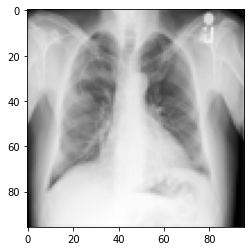

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.show()

Next, convert the text labels into a binary representation.

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_transformer = LabelBinarizer()
train_y = label_transformer.fit_transform(train_labels)
val_y = label_transformer.transform(val_labels)

Keras will expect that all images have a dimension for channels, so we will need to add that dimension.

In [0]:
# adding a dimension for channel
train_X = np.expand_dims(train_X, 3)
val_X = np.expand_dims(val_X, 3)

Now you are ready to build your convolutional neural networks below.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(train_X.shape[1:])))
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, validation_data=(val_X,val_y), epochs=5, batch_size=32)

Epoch 1/5
55/55 [==============================] - 1s 21ms/step - loss: 65.2871 - accuracy: 0.5543 - val_loss: 3.2558 - val_accuracy: 0.5881
Epoch 2/5
55/55 [==============================] - 1s 15ms/step - loss: 1.6985 - accuracy: 0.6943 - val_loss: 1.8634 - val_accuracy: 0.6613
Epoch 3/5
55/55 [==============================] - 1s 15ms/step - loss: 0.7356 - accuracy: 0.7829 - val_loss: 1.3112 - val_accuracy: 0.6819
Epoch 4/5
55/55 [==============================] - 1s 15ms/step - loss: 0.3733 - accuracy: 0.8634 - val_loss: 1.3434 - val_accuracy: 0.6636
Epoch 5/5
55/55 [==============================] - 1s 15ms/step - loss: 0.2291 - accuracy: 0.9074 - val_loss: 1.3430 - val_accuracy: 0.6705
